In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
import numpy as np

fabp1 = pd.read_csv('FABP1.csv')
fabp1.head(23)

,ligand name,Ki(nm),Log(Ki),Log(O/W),CNS,QPlogS,mol_MW,QPlogBB,QPlogKhsa,PSA,IFD,MMGBSA
0,THC,1000,3.000000,5.64,0,-6.672,314.467,-0.103,1.225,25.949,-8.925,-47.6959
1,CBD,167,2.222716,5.38,0,-6.155,314.467,-0.474,1.066,38.177,-9.419,-49.6266
2,BMS-309403,21,1.322219,5.64,-1,-7.770,474.558,-0.873,1.479,74.587,-13.865,-62.9611
3,AM-404,29,1.462398,6.87,-2,-8.354,395.584,-1.669,1.338,57.795,-12.450,-56.3212
4,SCPI4,33,1.518514,4.47,2,-5.339,363.550,0.585,0.365,28.937,-11.105,NaN
5,VDM11,37,1.568202,7.14,-2,-8.041,409.611,-1.572,1.512,55.703,-11.534,-54.3661
6,OMDM-2,40,1.602060,5.51,-2,-5.904,431.657,-2.188,0.564,77.057,-10.950,-59.7882
7,OMDM-1,40,1.602060,5.51,-2,-6.275,431.657,-2.111,0.558,70.412,-10.905,-59.0270
8,2-OG,40,1.602060,4.86,-2,-5.596,356.545,-2.210,0.497,77.892,-9.830,-48.6365
9,OEA,43,1.633468,4.46,-2,-4.708,325.534,-1.489,0.219,54.990,-9.810,-49.0593


In [2]:
fabp1.shape

(18, 12)

In [3]:
fabp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ligand name  18 non-null     object 
 1   Ki(nm)       18 non-null     int64  
 2   Log(Ki)      18 non-null     float64
 3   Log(O/W)     18 non-null     float64
 4   CNS          18 non-null     int64  
 5   QPlogS       18 non-null     float64
 6   mol_MW       18 non-null     float64
 7   QPlogBB      18 non-null     float64
 8   QPlogKhsa    18 non-null     float64
 9   PSA          18 non-null     float64
 10  IFD          18 non-null     float64
 11  MMGBSA       17 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 1.8+ KB


In [4]:
fabp1.columns

Index(['ligand name', 'Ki(nm)', 'Log(Ki)', 'Log(O/W)', 'CNS', 'QPlogS',
       'mol_MW', 'QPlogBB', 'QPlogKhsa', 'PSA', 'IFD', 'MMGBSA'],
      dtype='object')

In [5]:
fabp1["CNS"].unique()

array([ 0, -1, -2,  2,  1], dtype=int64)

In [6]:
fabp1["CNS"].value_counts()

-2    11
 0     3
-1     2
 2     1
 1     1
Name: CNS, dtype: int64

In [7]:
fabp1.describe()

,Ki(nm),Log(Ki),Log(O/W),CNS,QPlogS,mol_MW,QPlogBB,QPlogKhsa,PSA,IFD,MMGBSA
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,17.000000
mean,197.388889,1.959691,5.175556,-1.166667,-5.992333,370.844222,-1.191333,0.722500,58.544833,-10.200167,-52.018265
std,294.301794,0.515953,1.005644,1.248529,1.212572,43.905241,0.883445,0.455664,18.936785,1.471385,5.848448
min,21.000000,1.322219,2.770000,-2.000000,-8.354000,314.467000,-2.331000,0.154000,24.030000,-13.865000,-62.961100
25%,40.000000,1.602060,4.552500,-2.000000,-6.593750,342.470000,-1.910500,0.387750,54.990000,-11.066250,-56.321200
50%,59.500000,1.774379,5.255000,-2.000000,-6.029500,363.852500,-1.415500,0.561000,58.405000,-9.668500,-50.867700
75%,166.000000,2.220084,5.607500,-0.250000,-5.031500,391.325750,-0.545750,1.166500,73.581000,-9.223750,-48.655600
max,1000.000000,3.000000,7.140000,2.000000,-4.341000,474.558000,0.585000,1.512000,86.775000,-8.100000,-40.174700


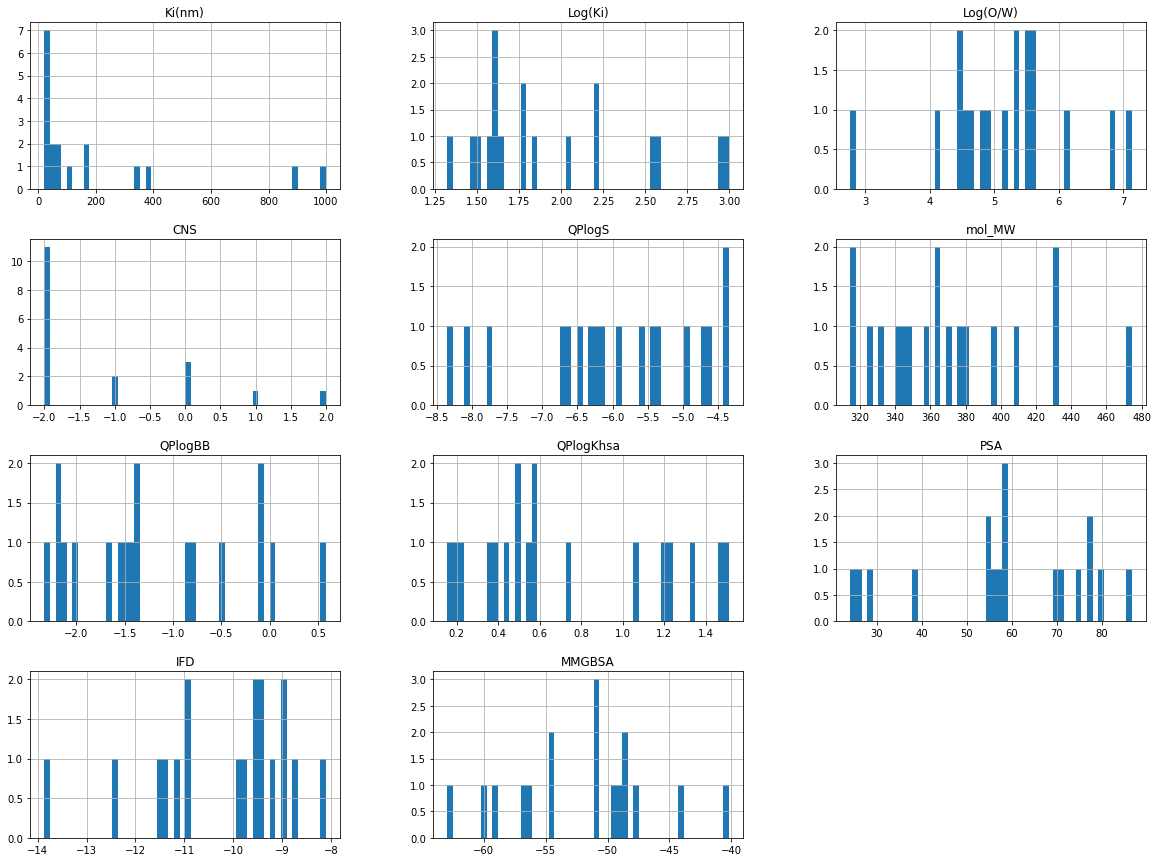

In [8]:
fabp1.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
train_set, test_set= train_test_split(fabp1, test_size = 0.2, random_state=50)
train_set.shape
train_set.head(2)

,ligand name,Ki(nm),Log(Ki),Log(O/W),CNS,QPlogS,mol_MW,QPlogBB,QPlogKhsa,PSA,IFD,MMGBSA
8,2-OG,40,1.602060,4.86,-2,-5.596,356.545,-2.210,0.497,77.892,-9.830,-48.6365
2,BMS-309403,21,1.322219,5.64,-1,-7.770,474.558,-0.873,1.479,74.587,-13.865,-62.9611


In [10]:
data = train_set.copy()

In [11]:
data.head()

,ligand name,Ki(nm),Log(Ki),Log(O/W),CNS,QPlogS,mol_MW,QPlogBB,QPlogKhsa,PSA,IFD,MMGBSA
8,2-OG,40,1.602060,4.86,-2,-5.596,356.545,-2.210,0.497,77.892,-9.830,-48.6365
2,BMS-309403,21,1.322219,5.64,-1,-7.770,474.558,-0.873,1.479,74.587,-13.865,-62.9611
7,OMDM-1,40,1.602060,5.51,-2,-6.275,431.657,-2.111,0.558,70.412,-10.905,-59.0270
10,JWH-018,58,1.763428,6.17,0,-6.220,341.452,-0.078,1.200,24.030,-11.400,-50.8677
9,OEA,43,1.633468,4.46,-2,-4.708,325.534,-1.489,0.219,54.990,-9.810,-49.0593


(14, 12)

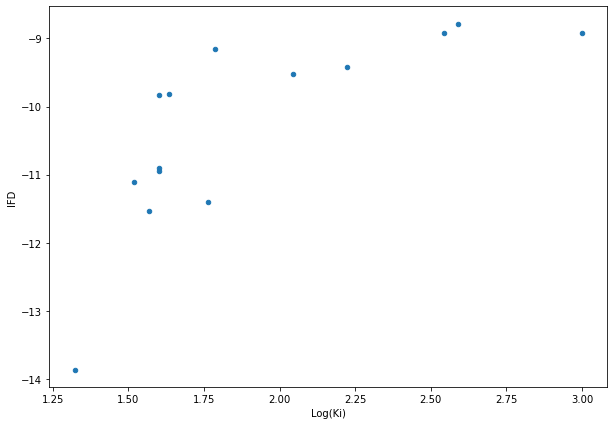

In [12]:
data.plot(kind="scatter", x="Log(Ki)", y="IFD", figsize=(10,7))
data.shape

<AxesSubplot:xlabel='Log(Ki)', ylabel='IFD'>

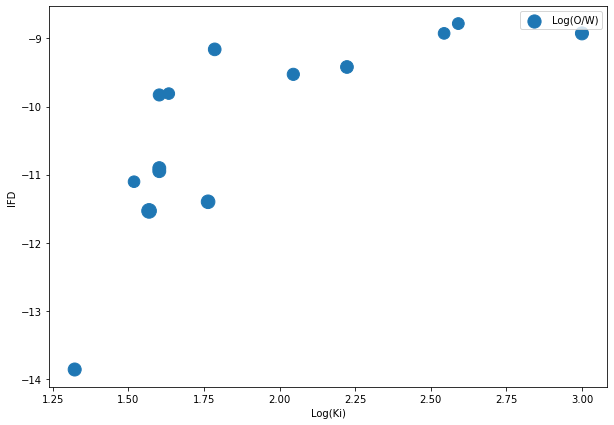

In [13]:
data.plot(kind="scatter", x="Log(Ki)", y="IFD",
          s=data["Log(O/W)"]*30, label="Log(O/W)",
          figsize=(10,7))

<AxesSubplot:xlabel='Log(Ki)', ylabel='IFD'>

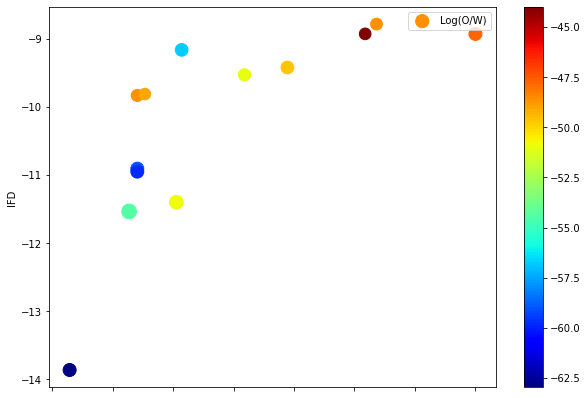

In [14]:
data.plot(kind="scatter", x="Log(Ki)", y="IFD",
          s=data["Log(O/W)"]*30, label="Log(O/W)",
          c=data["MMGBSA"], cmap=plt.get_cmap("jet"),
          figsize=(10,7))

<AxesSubplot:xlabel='Log(Ki)', ylabel='IFD'>

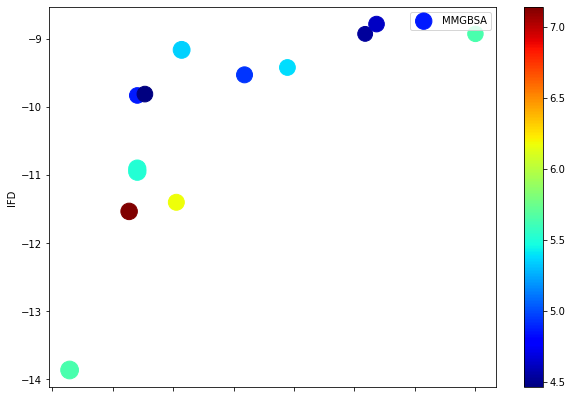

In [15]:
data.plot(kind="scatter", x="Log(Ki)", y="IFD",
          s=data["MMGBSA"]*-5, label="MMGBSA",
          c=data["Log(O/W)"], cmap=plt.get_cmap("jet"),
          figsize=(10,7))

# standard correlation coefficient

In [16]:
corr_matrix = data.corr()
corr_matrix["Ki(nm)"].sort_values(ascending=False)

Ki(nm)       1.000000
Log(Ki)      0.893460
IFD          0.513183
MMGBSA       0.499429
QPlogBB      0.378967
CNS          0.268121
QPlogKhsa    0.149008
QPlogS      -0.009365
Log(O/W)    -0.061568
PSA         -0.427287
mol_MW      -0.446462
Name: Ki(nm), dtype: float64

In [17]:
corr_matrix["Log(Ki)"].sort_values(ascending=False)

Log(Ki)      1.000000
Ki(nm)       0.893460
IFD          0.739703
MMGBSA       0.698294
QPlogBB      0.357022
CNS          0.251723
QPlogS       0.171928
QPlogKhsa   -0.036628
Log(O/W)    -0.208752
PSA         -0.401947
mol_MW      -0.589004
Name: Log(Ki), dtype: float64

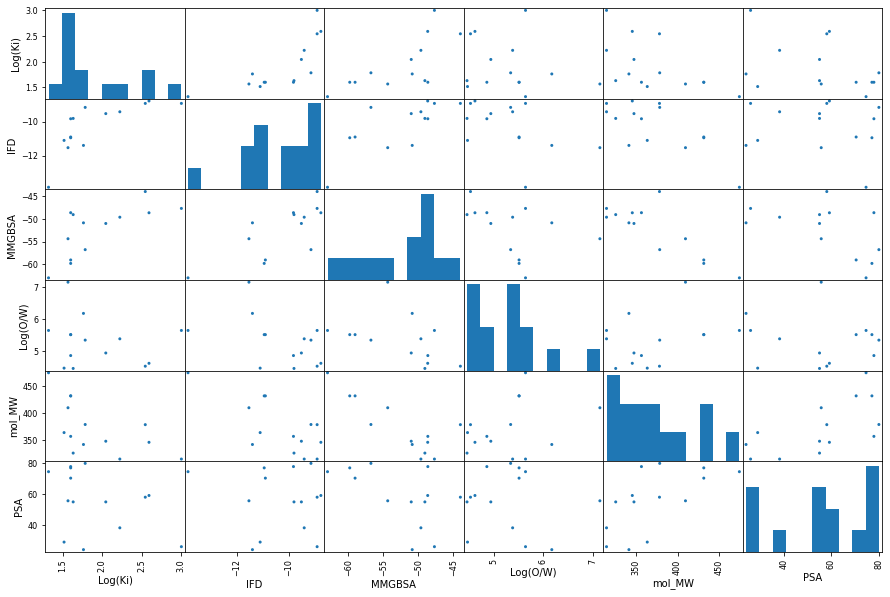

In [18]:
features = ["Log(Ki)", "IFD", "MMGBSA", "Log(O/W)", "mol_MW", "PSA" ]
scatter_matrix(data[features], figsize=(15,10), alpha=1)
plt.show()

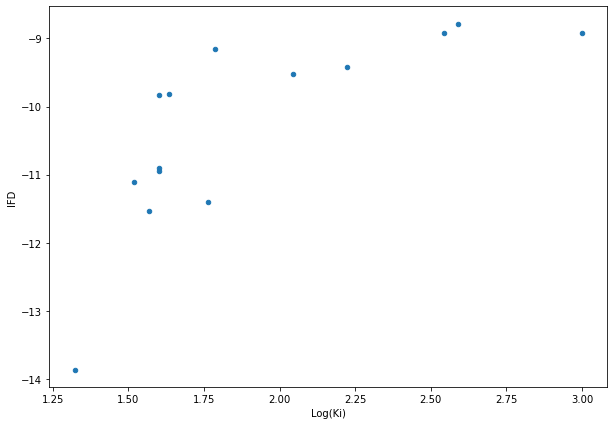

In [19]:
data.plot(kind="scatter", x="Log(Ki)", y="IFD", figsize=(10,7), alpha=1)
plt.show()

In [20]:
data["Log(O/W)_per_mol_MW"] = data["Log(O/W)"]/data["mol_MW"]
data["PSA_per_mol_MW"] = data["PSA"]/data["mol_MW"]
data["QPlogBB_per_Log(O/W)"] = data["QPlogBB"]/data["Log(O/W)"]

In [21]:
data.head()

,ligand name,Ki(nm),Log(Ki),Log(O/W),CNS,QPlogS,mol_MW,QPlogBB,QPlogKhsa,PSA,IFD,MMGBSA,Log(O/W)_per_mol_MW,PSA_per_mol_MW,QPlogBB_per_Log(O/W)
8,2-OG,40,1.602060,4.86,-2,-5.596,356.545,-2.210,0.497,77.892,-9.830,-48.6365,0.013631,0.218463,-0.454733
2,BMS-309403,21,1.322219,5.64,-1,-7.770,474.558,-0.873,1.479,74.587,-13.865,-62.9611,0.011885,0.157172,-0.154787
7,OMDM-1,40,1.602060,5.51,-2,-6.275,431.657,-2.111,0.558,70.412,-10.905,-59.0270,0.012765,0.163120,-0.383122
10,JWH-018,58,1.763428,6.17,0,-6.220,341.452,-0.078,1.200,24.030,-11.400,-50.8677,0.018070,0.070376,-0.012642
9,OEA,43,1.633468,4.46,-2,-4.708,325.534,-1.489,0.219,54.990,-9.810,-49.0593,0.013701,0.168922,-0.333857


In [22]:
corr_matrix = data.corr()
corr_matrix["Ki(nm)"].sort_values(ascending=False)

Ki(nm)                  1.000000
Log(Ki)                 0.893460
IFD                     0.513183
MMGBSA                  0.499429
QPlogBB                 0.378967
Log(O/W)_per_mol_MW     0.352875
QPlogBB_per_Log(O/W)    0.344780
CNS                     0.268121
QPlogKhsa               0.149008
QPlogS                 -0.009365
Log(O/W)               -0.061568
PSA_per_mol_MW         -0.348187
PSA                    -0.427287
mol_MW                 -0.446462
Name: Ki(nm), dtype: float64

### preparing the data

In [23]:
df = train_set.copy()
df_label=df["Log(Ki)"].copy()
df_num = df.drop("Log(Ki)", axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 8 to 16
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ligand name  14 non-null     object 
 1   Ki(nm)       14 non-null     int64  
 2   Log(Ki)      14 non-null     float64
 3   Log(O/W)     14 non-null     float64
 4   CNS          14 non-null     int64  
 5   QPlogS       14 non-null     float64
 6   mol_MW       14 non-null     float64
 7   QPlogBB      14 non-null     float64
 8   QPlogKhsa    14 non-null     float64
 9   PSA          14 non-null     float64
 10  IFD          14 non-null     float64
 11  MMGBSA       13 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 1.4+ KB


In [24]:
imputer =SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(df_num)


ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: '2-OG'